In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('diabetis.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [2]:
X = df[['glucose','bloodpressure']]
y = df['diabetes']

In [3]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
#Modeling (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Prediction
y_pred = model.predict(X_test)
print("Random Forest classifier Prediction: ",y_pred)

Random Forest classifier Prediction:  [1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 1 0]


In [6]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
# Mean Squared Error (MSE) - Not commonly used for classification, but can be calculated
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Classifier MSE:",mse)

Random Forest Classifier MSE: 0.06020066889632107


In [7]:
from sklearn.metrics import  roc_auc_score, auc, roc_curve
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report Random Forest:\n", class_report)

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       140
           1       0.95      0.94      0.94       159

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



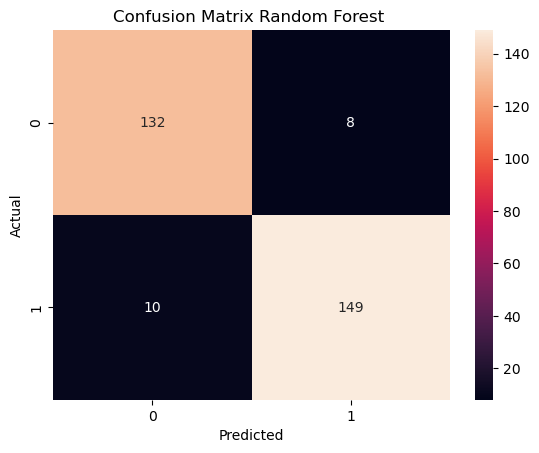

In [8]:
# Confusion Matrix
import seaborn as sns

cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest ')
plt.show()

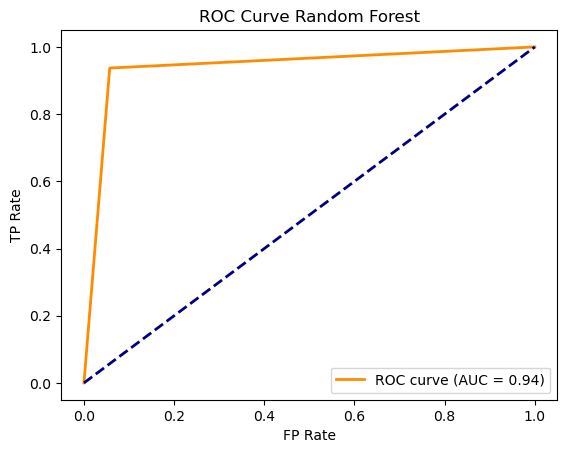

In [9]:
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the AUC (Area Under the Curve)
    auc = roc_auc_score(y_test, y_pred)
    # Create the ROC curve plot
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title(f'ROC Curve Random Forest')
    plt.legend(loc='lower right')
    plt.show()